<center><b>Ecole Polytechnique, Cycle Ingénieur (2A)<b></center>
<center>MAP471A - Problem solving en mathématiques appliquées</center>
<center>Enseignants : Lucas Gerin <a href="mailto:lucas.gerin@polytechnique.edu">(mail)</a> 
    Teddy Pichard	<a href="mailto:teddy.pichard@polytechnique.edu">(mail)</a>
    Nicole Spillane	<a href="mailto:nicole.spillane@polytechnique.edu">(mail)</a>
        </center>


# Algorithmes randomisés

In [1]:
# css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom2.css").read()
    return HTML(styles)
css_styling()

In [2]:
# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  
import random
%matplotlib inline  

## Table des matières

- [Algo randomisé pour le tri : Quicksort](#Prelim)
 - [Random Quicksort (uniforme)](#Uniform)
 - [Median-of-Three Quicksort](#Median)
- [Algo randomisé pour la médiane](#QuickSelect)



# Introduction

L'objectif de ce TP est d'illustrer la puissance des algorithmes probabilistes (ou <i>randomisés</i>) pour résoudre des problèmes déterministes. Il existe deux grandes classes d'algorithmes randomisés :

* Les algorithmes de Las Vegas ont un temps d'exécution aléatoire mais donnent une réponse exacte ;
* Les algorithmes de Monte-Carlo ont un temps d'éxecution qui est déterministe (ou aléatoire mais borné) et donne une réponse approchée.

Nous allons nous concentrer ici sur des algorithmes de Las Vegas pour le tri de nombres.

<a id="Prelim"></a>
# Quicksort


`Quicksort` est l'un des algorithmes les plus populaires pour trier une liste de nombres $L=x_1,\dots,x_n$. L'objectif de cette section est d'analyser le comportement de `Quicksort` (et de ses variantes) lorsque les $x_i$ sont aléatoires et i.i.d.

Définissons formellement la sortie $\mathrm{Quicksort}(L)$ de l'algorithme : c'est la liste $L$  triée par ordre croissant.
L'idée de QuickSort est d'utiliser la stratégie <i>Diviser-pour-régner</i> et se décompose récursivement de la façon suivante :

1. Si $L$ est vide ou réduite à un seul élément, $\mathrm{Quicksort}(L)=L$.
2. Sinon le 1er élément $x_1$ est appelé <i>pivot</i> de la liste. On compare chacun des $n-1$ autre éléments à $x_1$ pour obtenir deux sous-listes
\begin{align*}
L_< = \{x_j; j\geq 2, x_j<x_1\},\\
L_{\geq} = \{x_j; j\geq 2, x_j\geq x_1\}.
\end{align*}
3. On applique récursivement l'algorithme à $L_<$ et $L_\geq$ : on renvoie la concaténation des trois listes
$$
\mathrm{Quicksort}(L_<),\qquad [x_1],\qquad \mathrm{Quicksort}(L_\geq).
$$

Voici schématiquement l'exécution de Quicksort  pour $L=[4,3,5,1,6,2]$:
<img src="figures/Quicksort.jpg" style="width:800px;"/>

On note $C(x_1,x_2,\dots,x_n)$ le nombre de comparaisons nécessaires pour trier la liste $x_1,\dots,x_n$. L'exemple ci-dessus démontre que
$$
C(4,3,5,1,6,2)=5+1+2+1=9.
$$


<div markdown=1 class=Rmk>
La complexité <i>dans le pire cas</i> de Quicksort est quadratique : il existe $c,C>0$ telles que

$$
cn^2 \leq \max_{x_1,\dots, x_n} C(x_1,x_2,\dots,x_n) \leq C n^2.
$$

<i>(Ici le seul coût considéré dans la complexité est le nombre de comparaisons de deux réels. On néglige donc les coûts d'accès et écriture en mémoire.)</i><br><br>
<b>Preuve :</b> Lorsque les $x_1,x_2,\dots,x_n$ sont déjà triés l'algorithme effectue
$$
(n-1)+(n-2)+\dots + 1 \sim \tfrac{1}{2}n^2 \text{ comparaisons,}
$$
d'où l'inégalité de gauche.

Pour l'inégalité de droite, montrons par récurrence que
$$
\max_{x_1,\dots, x_n} C(x_1,x_2,\dots,x_n) \leq 2 n^2.
$$
Pour $n=1$ c'est ok. Ensuite
\begin{align*}
C(x_1,x_2,\dots,x_n) &= (n-1) + C(\{x_j \text{ tels que }x_j<x_1\} ) + C(\{x_j \text{ tels que }x_j\geq x_1\} )\\
&\leq (n-1) + \max_{0\leq r\leq n-1} \bigg\{ \max_{y_1,\dots,y_r}C(y_1,\dots,y_r) + \max_{y_{r+1},\dots,y_{n-1}}C(y_{r+1},\dots,y_{n-1})\bigg\}\\
&\leq (n-1)+ \max_{0\leq r\leq n-1} 2r^2 + 2(n-1-r)^2\\
&\leq (n-1) +2(n-1)^2/2 \leq 2n^2.
\end{align*}

<a id="Uniform"></a>
L'objectif est d'évaluer la variable aléatoire $C_n:=C(X_1,\dots,X_n)$
lorsque les données sont des variables aléatoires $X_1,\dots,X_n$ i.i.d. uniformes sur $[0,1]$.  C'est donc l'analyse en complexité moyenne de `Quicksort`.

On admet les choses suivantes :
1. On a l'identité en loi :
$$
\mathrm{card} (L_<) \stackrel{\text{(loi)}}{=} \mathrm{card} (L_\geq) \stackrel{\text{(loi)}}{=} \text{Uniforme dans }\{0,1,\dots,n-1\}.
$$
2. Conditionnellement à $X_1$, les $X_j$ dans $L_<$ sont répartis uniformément dans l'intervalle $[0,X_1]$ et sont indépendants. (On  bien sûr le même énoncé pour $L_\geq$.)

On en déduit donc que le nombre aléatoire de comparaisons $C_n$ pour une liste de taille $n$ vérifie
\begin{align*}
C_0&=0,\\
C_1&=0,\\
\text{Pour tout }n\geq 2,\quad C_n &\stackrel{\text{(loi)}}{=} n-1 + C'_{U_n-1} + C''_{n-U_n}, \tag{$\$ $}
\end{align*}
où $U_n$ est une uniforme sur $\{1,\dots,n\}$ et pour tout $k$, $C_k,C'_k, C''_k$ ont même loi, sont indépendantes entre elles et indépendantes de $U_n$.


<div markdown=1 class="DoIt"> 

1. Ecrire une fonction `Uniform(a,b)` qui renvoie un tirage d'une v.a. uniforme dans $\{a,a+1,\dots,b\}$.<br>
<i>(Rappel : `np.random.rand()` renvoie un réel uniforme dans $[0,1]$.</i>
2. Utiliser la relation $(\$)$ pour simuler des variables aléatoires $C_n$.<br>
Pour visualiser on vous suggère de tracer une grande quantité de points $(n,C_n)$ sur le même graphique, ainsi que $n\mapsto 2n\log(n)-2.85n$. (Prendre $n$ entre $1$ et $2000$.) <br><br>
<i>(<b>Attention!</b> Il n'y a pas besoin de réellement implémenter Quicksort, simplement de simuler $C_n$.)</i>

3. On peut démontrer (*) que
$$
\mathbb{E}[C_n] = 2n\log(n)-2.85n +o(n).
$$
Comparer avec vos résultats.<br>


(*) Référence: Voir par exemple p.37 dans M.Mitzenmacher, E.Upfal (2005). Probability and Computing. <i>Cambridge University Press</i>.

In [3]:
def Uniform(a,b):
    # returns the draw of a fair dice in {a,a+1,...,b}
    return int( np.random.rand() * (b-a+1)+ a )



In [4]:
memo = dict()
def RandomQuicksort(n):
    if n == 0 or n == 1:
        return 0
    # returns a sample of C_n
    #
    #
    u_n= Uniform(1, n)
    

    Cn = n - 1 + RandomQuicksort(u_n - 1) + RandomQuicksort(n - u_n)
    return Cn

In [5]:
Cn = []
for i in range(1500):
    Cn.append(RandomQuicksort(i))
    

In [6]:
func = [2*i * np.log(i) - 2.85 *i for i in range(1,1500)] 

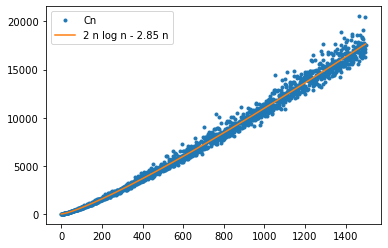

In [7]:
plt.plot(Cn,
         label = "Cn",
         marker = '.',
         linestyle = "None")
plt.plot(func,
         label = "2 n log n - 2.85 n")

plt.legend()

<div markdown=1 class=Rmk>

La conséquence des cette analyse est que le comportement moyen en $2n\log(n)$ est bien inférieur au comportement dans le pire cas en $n^2$. C'est pourquoi dans certaines libraires l'algorithme Quicksort est implémenté avec une étape préliminaire consistant à mélanger uniformément la liste $x_1,\dots,x_n$.<br>
Concrètement, il suffit simplement de choisir le pivot uniformément dans la liste à chaque itération de l'algorithme.

<a id="Median"></a>
### Une amélioration : Median-of-Three Quicksort

Intuitivement, Quicksort est plus efficace lorsque $L_<$ et $L_{\geq}$ sont de taille équivalente. Pour exploiter cette idée, une variante assez utilisée dans la pratique consiste à prendre la médiane de $X_1,X_2,X_3$ comme pivot au lieu de $X_1$. C'est <i>Median-of-Three Quicksort</i>.<br>
L'objectif est d'illustrer l'efficacité de cette variante.

<div markdown=1 class="DoIt"> 

1. Les variables aléatoires $X_1,X_2,X_3$ sont indépendantes et uniformes sur $[0,1]$. Quelle est la loi du nombre de comparaisons nécessaires pour trouver la médiane de $X_1,X_2,X_3$? On note $\mathcal{M}$ une réalisation de cette variable, écrire une fonction qui simule $\mathcal{M}$.

2. Déterminer l'analogue de $(\$)$ pour Median-of-Three Quicksort. En déduire des simulations des variables aléatoires $D_n$ définies par le nombre de comparaisons pour Median-of-Three Quicksort.<br> 
<i>(Attention : ne pas oublier le coût de calcul de la médiane.)</i>

3. Comparer vos simulations avec Quicksort classique en affichant une grande quantité de points $(n,C_n)$ et $(n,D_n)$ sur le même graphique. Afficher également le résultat en moyenne :<br>
Pour Median-of-Three Quicksort on a
$$
\mathbb{E}[D_n] = \tfrac{12}{7}n\log(n)-1.827n +o(n).
$$
(voir Th.3.5 dans Sedgewick, R., & Flajolet, P. (2013). An introduction to the analysis of algorithms.)


<div markdown=1 class="Answers">

1. On compare d'abord $X_1$ et $X_2$. 
* Si $X_1 = X_2$, on sait que la mediane vaut $X_1$.
* Si $X_1 < X_2$, on compare $X_2$ et $X_3$. Si $X_2 = X_3$, où $X_2 < X_3$ la mediane vaux $X_2$
* Si $X_1 < X_2$ et $X_2 > X_3$, la mediane vaux $\min {(X_1, X_3)}$

Donc, il nous faut 1, 2 ou 3 comparaisons

$$
\begin{aligned}
    D(n) = \\
    &  0, \ si \ n = 1 \ ou \ n = 0 \\
    &  1, \ si \ n = 2 \\
    & \mathcal{M} + n- 3 + D(U_n -1) + D(n - U_n)
\end{aligned}
$$


In [8]:
def simule_m():
    if np.random.rand() < 1/3:
        return 2
    return 3
    


In [9]:
def three_uniform(n):
    x1 = Uniform(1,n)
    x2 = x1
    while(x2 == x1):
        x2 = Uniform(1,n)
    
    x3 = x2

    while(x3 == x2) or (x3 == x1):
        x3 = Uniform(1,n)

    return [x1, x2, x3]

In [10]:
def MS_Quicksort(n):
    # returns a sample of D_n
    #
    #
    if n < 3:
        return RandomQuicksort(n)
    
    v_n = np.median(three_uniform(n))

    return simule_m()+ n - 3 + MS_Quicksort(v_n - 1) + MS_Quicksort(n - v_n)

In [11]:
MS_Quicksort(100)

555.0

In [12]:
Dn = [MS_Quicksort(i) for i in range(1,1500)]
func = [12/7*i * np.log(i) - 1.827 *i for i in range(1,1500)] 

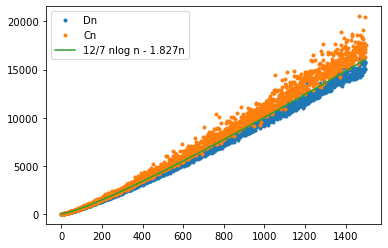

In [13]:
plt.plot(Dn,
         marker = '.',
         label = "Dn",
         linestyle = "none")
plt.plot(Cn,
         marker = '.',
         label = "Cn",
         linestyle = "none")
plt.plot(func,
         label = "12/7 nlog n - 1.827n")

plt.legend()

<a id="QuickSelect"></a>
#  Algorithmes randomisés pour la médiane

Un algorithme naïf pour trouver la médiane d'une liste $\{X_1,\dots, X_n\}$ consiste à trier la liste et à lire ensuite le $\lfloor n/2\rfloor$-ème élément. D'après ce qui précède cela coûte $\text{constante}\times n\log(n)$ comparaisons.

Nous allons utiliser la stratégie randomisée pour trouver la médiane avec un nombre linéaire de comparaisons.

## QuickMedian


<div markdown=1 class="DoIt">

1. En s'inspirant de la stratégie QuickSort, décrire un algorithme efficace QuickMedian qui renvoie le $k$-ème plus petit élément d'une liste $\{X_1,\dots, X_n\}$ (sans trier toute la liste!). 

2. Ecrire la relation de récurrence pour le nombre de comparaisons $S_{n,k}$ effectuées par QuickMedian.


$$
    S_{n,k} = n - 1 + S_{n - U_{0, n-k}, n-k - U_{0, n-k}} 
$$

1. On choisit un pivot $i$ uniformement dans ${1, ..., n-1}$ et on prend $x_i$
2. On divise les listes entre $L_- : x \leq x_i$,  et $L_+: x > x_i $
3. On prend recursivement, jusqu'a on arrive a une taille qu'on veut: par example

```bash
Consider the list below. We'd like to find the median.
l = [9,1,0,2,3,4,6,8,7,10,5]
len(l) == 11, so we're looking for the 6th smallest element
First, we must pick a pivot. We randomly select index 3.
The value at this index is 2.

Partitioning based on the pivot:
[1,0,2], [9,3,4,6,8,7,10,5]
We want the 6th element. 6-len(left) = 3, so we want
the third smallest element in the right array

We're now looking for third smallest element in the array below:
[9,3,4,6,8,7,10,5]
We pick an index at random to be our pivot.
We pick index 3, the value at which, l[3]=6

Partitioning based on the pivot:
[3,4,5,6] [9,7,10]
We want the 3rd smallest element, so we know it's the
3rd smallest element in the left array

We're now looking for the 3rd smallest in the array below:
[3,4,5,6]
We pick an index at random to be our pivot.
We pick index 1, the value at which, l[1]=4
Partitioning based on the pivot:
[3,4] [5,6]
We're looking for the item at index 3, so we know it's
the smallest in the right array.

We're now looking for the smallest element in the array below:
[5,6]

At this point, we can have a base case that chooses the larger
or smaller item based on the index.
We're looking for the smallest item, which is 5.
return 5
```

In [49]:
def S(n, k):
    
    if n == 1:
        return 1
    if n == 0:
        return 0
    u_n_k = Uniform(0, n-k)
    
    return n - 1 + S(n-u_n_k, n-k - u_n_k) 

In [220]:
n_ops = 0
def quick_k_element(l, k):
    global n_ops 
    
    n = len (l)
    n_ops += n-1
    if n == 1:
        return l[0]

    if n ==0 :
        return
    
    pivot = Uniform(0, n-1)
    print(pivot, len(l))
    pivot_value = l[pivot]

    higher = [x for x in l if x> pivot_value]
    lower = [x for x in l if x < pivot_value]
    eq_pivot = [x for x in l if x == pivot_value]

    if len(lower) > k:
        return quick_k_element(lower, k)
    
    if len(lower) + len(eq_pivot) > k:
        return pivot_value
    
    print(k - len(lower)- len(pivot))
    
    return quick_k_element(higher, k - len(lower) - len(eq_pivot))
    


In [98]:
import numpy as np
import matplotlib.pyplot as plt
def Uniform(a,b):
    # returns the draw of a fair dice in {a,a+1,...,b}
    return int( np.random.rand() * (b-a+1)+ a )


In [99]:
l = [i for i in range(100)]
np.random.shuffle(l)

In [129]:
p = []
for i in range(1000):
    n_ops = 0
    quick_k_element(l, 14)
    p.append(n_ops)

In [130]:
q = [S(len(l), 14) for i in range(1000)]


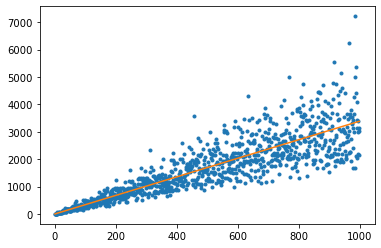

In [54]:
s_n_n2 = []
func = []
for i in range(1000):
    s_n_n2.append(S(i, i // 2))
    func.append(i*(2 + 2*np.log(2)))

plt.plot(s_n_n2,
         linestyle = "none",
         marker = '.')
plt.plot(func)

<div markdown=1 class="DoIt"> 

1. Ecrire une fonction qui simule la variable $S_{n,k}$. 

2. Afficher plusieurs simulations pour $k=\lfloor n/2\rfloor$ (calcul de la médiane). On devrait avoir
$$
\mathbb{E}[S_{n,\lfloor n/2\rfloor}] = n\left(2+2\log(2)\right) + \mathrm{o}(n) = n\times 3.3863... + \mathrm{o}(n) 
$$
(<a href="https://11011110.github.io/blog/2007/10/09/blum-style-analysis-of.html">Voir ce lien.</a>) 

<center>
    <font size=+3 color='red'>!! La partie obligatoire (à rendre sur Moodle) s'arrête ici !!</font>
</center>

<a id="Median"></a>
## Encore une variante de Quicksort: Diviser en 3-pour-régner

On va chercher à évaluer l'efficacité de Quicksort si on divise la liste en $3$ listes au lieu de $2$, en utilisant les pivots $X_1,X_2$. Pour cela on note $(I_n,J_n)$ une paire uniforme parmi les $\binom{n}{2}$ paires de la forme $\{1\leq i<j \leq n\}$.

<div markdown=1 class="DoIt"> 

1. Ecrire une fonction `PaireIJ`  qui tire au sort $(I_n,J_n)$.
2. Ecrire une fonction `NbComparaisons(i,j,n)` qui simule la variable aléatoire suivante : ($i,j$ étant fixés)  le coût pour trier $i,j,X_3$ lorsque $X_3$ est une uniforme sur $\{1,\dots,n\}$. On note $\mathcal{N}_n(i,j)$ une réalisation de cette v.a.
3. Ecrire l'analogue de  $(\$)$ pour la stratégie diviser en 3-pour-régner. En déduire des simulations des variables aléatoires $E_n$. Comparer avec Quicksort classique et median-of-three.


In [ ]:
def PaireIJ(a,b):
    # return a sample of (I_n,J_n)
    return

    

<div markdown=1 class="Answers">
 
2. 
3. 

<div markdown=1 class="DoIt"> 
Quelle est votre conclusion pour Quicksort avec la stratégie "Diviser en 3"


<div markdown=1 class="Answers">
